In [1]:
from datetime import datetime, timedelta, timezone
from tinkoff.invest import CandleInterval, Client
from tinkoff.invest.schemas import CandleSource
import pandas as pd
import mplfinance as mpf


In [2]:
TOKEN = "token_sandbox"

In [3]:
local_from = datetime(2025, 10, 3, 12)
local_to = datetime(2025, 10, 3, 18)

msk_tz = timezone(timedelta(hours=3))

utc_from = local_from.replace(tzinfo=msk_tz).astimezone(timezone.utc)
utc_to = local_to.replace(tzinfo=msk_tz).astimezone(timezone.utc)

data = []


In [4]:
with Client(TOKEN) as client:
    for candle in client.get_all_candles(
        instrument_id="BBG004730N88",
        from_=utc_from,
        to=utc_to,
        interval=CandleInterval.CANDLE_INTERVAL_5_MIN,
        candle_source_type=CandleSource.CANDLE_SOURCE_UNSPECIFIED,
    ):
        data.append({
            'time': candle.time.astimezone(msk_tz),
            'open': candle.open.units + candle.open.nano / 1e9,
            'high': candle.high.units + candle.high.nano / 1e9,
            'low': candle.low.units + candle.low.nano / 1e9,
            'close': candle.close.units + candle.close.nano / 1e9,
            'volume': candle.volume
        })

df = pd.DataFrame(data)


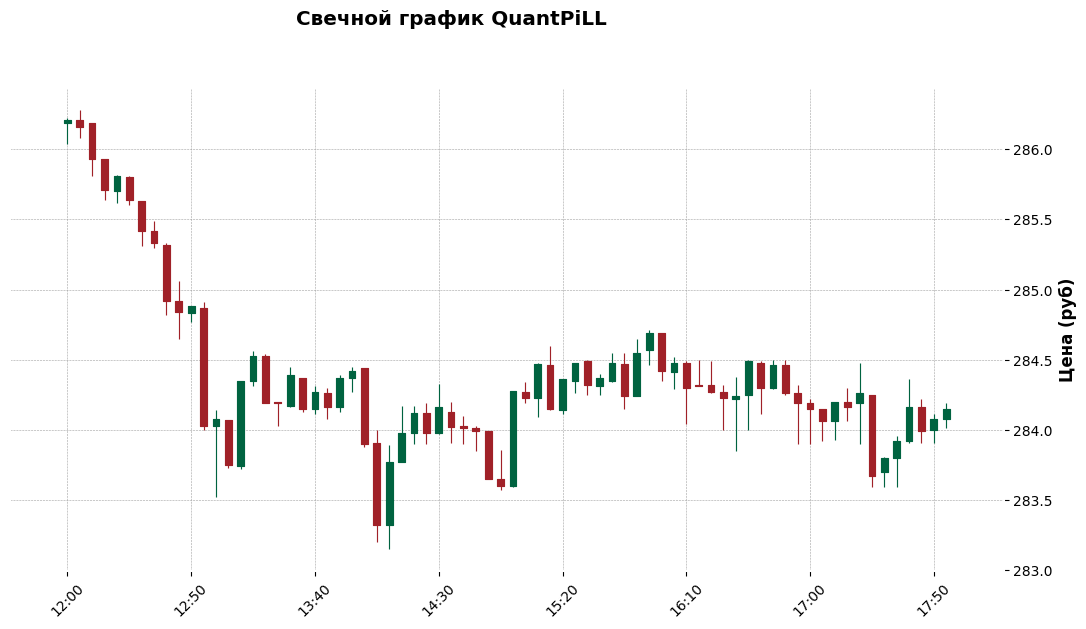

In [7]:
df_candles = df.set_index('time')
df_candles = df_candles[['open', 'high', 'low', 'close', 'volume']]

mpf.plot(
    df_candles,
    type='candle',
    style='charles',
    title='Свечной график QuantPiLL',
    ylabel='Цена (руб)',
    volume=False,
    figratio=(12, 6),
    figscale=1.2
)